## Combining two coefficients with different tlist

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def _fill_coeff(old_coeff, old_tlist, new_tlist):
    new_n = len(new_tlist)
    old_n = len(old_tlist)
    old_ind = 0
    new_coeff = np.empty(new_n)
    for new_ind in range(new_n):
        if old_ind == old_n-1:
            new_coeff[new_ind] = 0.
        else:
            if old_tlist[old_ind+1] == new_tlist[new_ind]:
                old_ind += 1
            new_coeff[new_ind] = old_coeff[old_ind]
    return new_coeff


def combine_coeffs(coeff1, coeff2, tlist1, tlist2):
    new_tlist = np.unique(np.sort(np.hstack((tlist1, tlist2))))
    if tlist1[0] != tlist2[0] or tlist1[-1] != tlist2[-1]:
        raise ValueError(
            "The first and last t in the two tlists must be the same.")
    new_coeff1 = _fill_coeff(coeff1, tlist1, new_tlist)
    new_coeff2 = _fill_coeff(coeff2, tlist2, new_tlist)
    return new_coeff1, new_coeff2, new_tlist

### Application: adding noise to a signal

In [3]:
coeff = np.array([0, 1, 2, 3, 4, 5, 5], dtype=float)
tlist = np.array([0, 1, 2, 3, 4, 5, 6], dtype=float)
noise = np.random.normal(0.0, 0.2, 50)
noise_tlist = np.linspace(0, 6 ,50)
new_coeff1, new_coeff2, new_tlist = combine_coeffs(coeff, noise, tlist, noise_tlist)

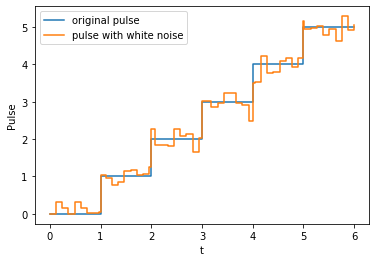

In [4]:
plt.step(tlist, coeff, where="post", label="original pulse")
plt.step(new_tlist, new_coeff1 + new_coeff2, where="post", label="pulse with white noise")
plt.xlabel("t")
plt.ylabel("Pulse")
plt.legend()